In [1]:
import tensorflow as tf
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('C:\\Users\\Dan\\Documents\\fall_2023\\670\\project\\dataset'): #directory needs to be changed here an in all subsequent mentionds
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\Dan\Documents\fall_2023\670\project\dataset\Abyssinian\Image_1.jpg
C:\Users\Dan\Documents\fall_2023\670\project\dataset\Abyssinian\Image_10.jpg
C:\Users\Dan\Documents\fall_2023\670\project\dataset\Abyssinian\Image_11.jpg
C:\Users\Dan\Documents\fall_2023\670\project\dataset\Abyssinian\Image_12.jpg
C:\Users\Dan\Documents\fall_2023\670\project\dataset\Abyssinian\Image_13.jpg
C:\Users\Dan\Documents\fall_2023\670\project\dataset\Abyssinian\Image_14.jpg
C:\Users\Dan\Documents\fall_2023\670\project\dataset\Abyssinian\Image_15.jpg
C:\Users\Dan\Documents\fall_2023\670\project\dataset\Abyssinian\Image_16.jpg
C:\Users\Dan\Documents\fall_2023\670\project\dataset\Abyssinian\Image_17.jpg
C:\Users\Dan\Documents\fall_2023\670\project\dataset\Abyssinian\Image_18.jpg
C:\Users\Dan\Documents\fall_2023\670\project\dataset\Abyssinian\Image_19.jpg
C:\Users\Dan\Documents\fall_2023\670\project\dataset\Abyssinian\Image_2.jpg
C:\Users\Dan\Documents\fall_2023\670\project\dataset\Abyssinian\Image_20.jpg
C

In [3]:
for dirpath,dirnames,filenames in os.walk("C:\\Users\\Dan\\Documents\\fall_2023\\670\\project\\dataset"): #printing all the different label classes available
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 74 directories and 0 images in 'C:\Users\Dan\Documents\fall_2023\670\project\dataset'.
There are 0 directories and 35 images in 'C:\Users\Dan\Documents\fall_2023\670\project\dataset\Abyssinian'.
There are 0 directories and 30 images in 'C:\Users\Dan\Documents\fall_2023\670\project\dataset\African Dwarf Frog'.
There are 0 directories and 30 images in 'C:\Users\Dan\Documents\fall_2023\670\project\dataset\African Grey Parrot'.
There are 0 directories and 30 images in 'C:\Users\Dan\Documents\fall_2023\670\project\dataset\American Shorthair'.
There are 0 directories and 30 images in 'C:\Users\Dan\Documents\fall_2023\670\project\dataset\American Toad'.
There are 0 directories and 30 images in 'C:\Users\Dan\Documents\fall_2023\670\project\dataset\Axolotls'.
There are 0 directories and 30 images in 'C:\Users\Dan\Documents\fall_2023\670\project\dataset\Beagle'.
There are 0 directories and 30 images in 'C:\Users\Dan\Documents\fall_2023\670\project\dataset\Bearded Dragon'.
There are 0 d

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def view_random_image(target_dir,target_class): #defining a function that picks a random image from a class
    target_folder=target_dir+target_class
    random_image=random.sample(os.listdir(target_folder),1)
    img=mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.axis("off");
    print(f"Image Shape: {img.shape}")
    return img

Image Shape: (994, 1325, 3)
Image Shape: (1055, 1280, 3)


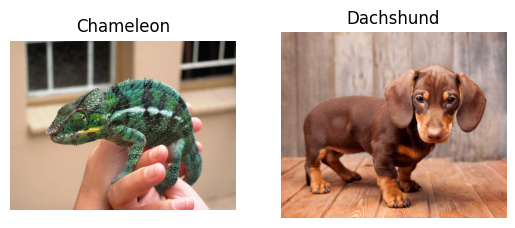

In [3]:
plt.figure()# just picking two random photos from classes I've selected and plotting them against each other
plt.subplot(1,2,1)
plt.title("Chameleon")
img=view_random_image(target_dir="C:\\Users\\Dan\\Documents\\fall_2023\\670\\project\\dataset",
                     target_class="\\Chameleon")
plt.subplot(1,2,2)
plt.title("Dachshund")
img2=view_random_image(target_dir="C:\\Users\\Dan\\Documents\\fall_2023\\670\\project\\dataset",
                     target_class="\\Dachshund")

In [4]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers

local_weights_file = "C:\\Users\\Dan\\Downloads\\inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"

# initializing pretrained base model, removing dense layers and setting input shape
pre_trained_model = InceptionV3(input_shape = (150, 150, 3),
                                include_top = False,
                                weights = None)


#loading predefined weights from file
pre_trained_model.load_weights(local_weights_file)

#freeze layer weights
for layer in pre_trained_model.layers:
  layer.trainable = False


#print base model
pre_trained_model.summary()


Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 74, 74, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 74, 74, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 74, 74, 32)           0         ['batch_normalizati

In [5]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model

#flatten the layers
x = layers.Flatten()(last_output)
#adding 1024 hidden units and relu activation
x = layers.Dense(1024, activation='relu')(x)
#setting droput rate at .2
x = layers.Dropout(0.2)(x)
#add final layer for classification predicitons
x = layers.Dense  (74, activation='softmax')(x)

# Append the base network to our pretrained model
model = Model(pre_trained_model.input, x)

#print entire model to ensure new portion is added at the end
model.summary()

last layer output shape:  (None, 7, 7, 768)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 74, 74, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 74, 74, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 74, 74, 32)   

In [6]:

#setting the evaluation parameters 
model.compile(optimizer = RMSprop(learning_rate=0.0001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = 'C:\\Users\\Dan\\Documents\\fall_2023\\670\\project\\dataset'



#adding our data normalization settings
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)



#creating training batches of 20 images at a time
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'categorical',
                                                    target_size = (150, 150))

Found 2262 images belonging to 74 classes.


In [7]:

#initialize the training
history = model.fit( #train model using 20 epochs and 100 steps per epoch
            train_generator,
            steps_per_epoch = 100,
            epochs = 20,
            verbose = 2)

Epoch 1/20


c:\Users\Dan\miniconda3\lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


100/100 - 174s - loss: 3.4775 - accuracy: 0.1780 - 174s/epoch - 2s/step
Epoch 2/20
100/100 - 109s - loss: 2.1149 - accuracy: 0.4445 - 109s/epoch - 1s/step
Epoch 3/20
100/100 - 144s - loss: 1.6612 - accuracy: 0.5439 - 144s/epoch - 1s/step
Epoch 4/20
100/100 - 144s - loss: 1.3605 - accuracy: 0.6266 - 144s/epoch - 1s/step
Epoch 5/20
100/100 - 145s - loss: 1.1953 - accuracy: 0.6559 - 145s/epoch - 1s/step
Epoch 6/20
100/100 - 123s - loss: 1.0520 - accuracy: 0.6922 - 123s/epoch - 1s/step
Epoch 7/20
100/100 - 117s - loss: 0.9620 - accuracy: 0.7281 - 117s/epoch - 1s/step
Epoch 8/20
100/100 - 94s - loss: 0.8586 - accuracy: 0.7392 - 94s/epoch - 936ms/step
Epoch 9/20
100/100 - 105s - loss: 0.8074 - accuracy: 0.7603 - 105s/epoch - 1s/step
Epoch 10/20
100/100 - 98s - loss: 0.7315 - accuracy: 0.7715 - 98s/epoch - 982ms/step
Epoch 11/20
100/100 - 94s - loss: 0.6637 - accuracy: 0.7962 - 94s/epoch - 939ms/step
Epoch 12/20
100/100 - 111s - loss: 0.6495 - accuracy: 0.7936 - 111s/epoch - 1s/step
Epoch 13/

1/1 [==============================] - 1s 1s/step


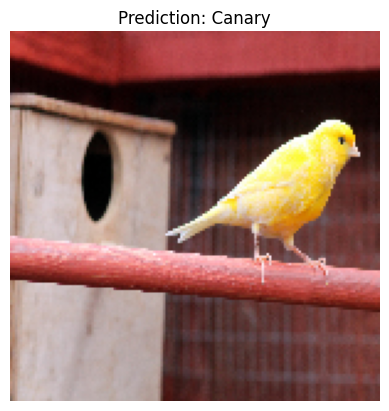

In [8]:
def pred_and_plot(model, filename, class_names): #this function prints the test image along with the predicted label
 
  
  img = load_and_prep_image(filename)

  
  pred = model.predict(tf.expand_dims(img, axis=0))

  
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);
import pathlib
data_dir=pathlib.Path("C:\\Users\\Dan\\Documents\\fall_2023\\670\\project\\dataset")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
def load_and_prep_image(filename, img_shape=150):
  
  img = tf.io.read_file(filename)

  
  img = tf.image.decode_image(img, channels=3)

  
  img = tf.image.resize(img, size = [img_shape, img_shape])

  
  img = img/255.
  return img


pred_and_plot(model, "C:\\Users\\Dan\\Documents\\fall_2023\\670\\project\\dataset\\Canary\\Image_1.jpg", class_names) #demonstrating on a random image

1/1 [==============================] - 0s 39ms/step


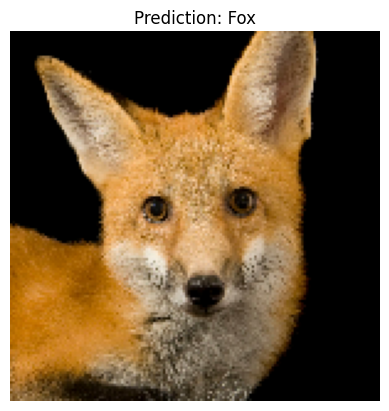

In [9]:
import urllib.request
url = "https://i.natgeofe.com/n/9b97e60e-e8db-4961-853b-d68ba28d7629/red-fox_thumb.JPG"
filename = "red-fox_thumb.JPG"
urllib.request.urlretrieve(url, filename)

pred_and_plot(model, "red-fox_thumb.JPG", class_names) #testing model on a image previously unseen by model

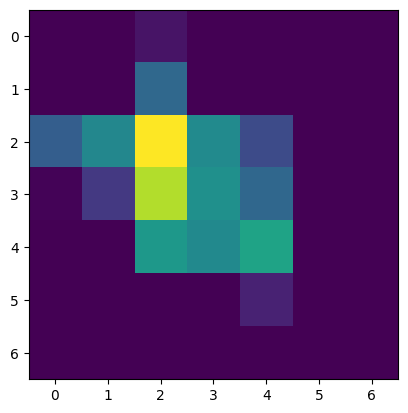

In [46]:
from tensorflow.keras import preprocessing
from tensorflow.keras import backend as K
from tensorflow.keras import models


newimg = load_and_prep_image("C:\\Users\\Dan\\Documents\\fall_2023\\670\\project\\dataset\\Canary\\Image_2.jpg")

newimg = tf.expand_dims(newimg, axis=0)




conv_layer = model.get_layer("conv2d_69")
heatmap_model = models.Model([model.inputs], [conv_layer.output, model.output])

# Get gradient of the winner class w.r.t. the output of the (last) conv. layer
with tf.GradientTape() as gtape:
    conv_output, predictions = heatmap_model(newimg)
    loss = predictions[:, np.argmax(predictions[0])]
    grads = gtape.gradient(loss, conv_output)
    pooled_grads = K.mean(grads, axis=(0, 1, 2))

heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_output), axis=-1)
heatmap = np.maximum(heatmap, 0)
max_heat = np.max(heatmap)
if max_heat == 0:
    max_heat = 1e-10
heatmap /= max_heat

hm=np.squeeze(heatmap)
hm.shape


plt.imshow(hm)

In [35]:
import Heatmap
from Heatmap import GradCAM



newimg = load_and_prep_image("C:\\Users\\Dan\\Documents\\fall_2023\\670\\project\\dataset\\Canary\\Image_1.jpg")

newimg = tf.expand_dims(newimg, axis=0)

pred = model.predict(newimg)

if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

map = GradCAM(model, 15)

heatimg = map.compute_heatmap(newimg)

#heatimg
#newimg

heatfinal = map.overlay_heatmap(heatimg, newimg.numpy())

heatfinal

1/1 [==============================] - 0s 42ms/step


error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\core\src\arithm.cpp:650: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'cv::arithm_op'
